[-6.28318531 -6.02672876 -5.77027222 -5.51381568 -5.25735913 -5.00090259
 -4.74444605 -4.48798951 -4.23153296 -3.97507642 -3.71861988 -3.46216333
 -3.20570679 -2.94925025 -2.6927937  -2.43633716 -2.17988062 -1.92342407
 -1.66696753 -1.41051099 -1.15405444 -0.8975979  -0.64114136 -0.38468481
 -0.12822827  0.12822827  0.38468481  0.64114136  0.8975979   1.15405444
  1.41051099  1.66696753  1.92342407  2.17988062  2.43633716  2.6927937
  2.94925025  3.20570679  3.46216333  3.71861988  3.97507642  4.23153296
  4.48798951  4.74444605  5.00090259  5.25735913  5.51381568  5.77027222
  6.02672876  6.28318531]
size of x = 50
[-6.28318531 -6.02672876 -5.77027222 -5.51381568 -5.25735913 -5.00090259
 -4.74444605 -4.48798951 -4.23153296 -3.97507642 -3.71861988 -3.46216333
 -3.20570679 -2.94925025 -2.6927937  -2.43633716 -2.17988062 -1.92342407
 -1.66696753 -1.41051099 -1.15405444 -0.8975979  -0.64114136 -0.38468481
 -0.12822827  0.12822827  0.38468481  0.64114136  0.8975979   1.15405444
  1.4105109

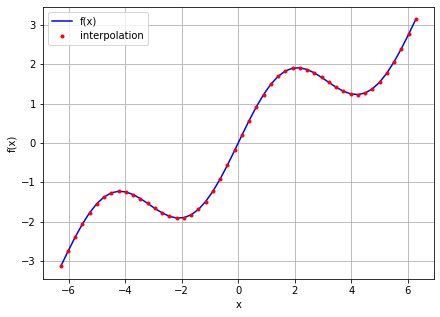

In [24]:
# refer to MTH319 Tutorial -No 3 - (Part I) Interpolation

#interpolation method by scipy
import scipy.interpolate as spi
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi)#setting x, from -2pi to 2pi, 25 elements
print(x)

print('size of x = %d'%(len(x)))


# example 1
# define a function f(x)
def f(x):
    return np.sin(x) + 0.5 * x
print (x)
f(np.array([10,9,8,7]))



#Thirdly, Fit
#Step1: get the knots, coefficients and degrees of the spline, ipo save the information
#k represents degree of the spline (1<k<5) (optional)
ipo = spi.splrep(x, f(x), k=1)  
print(ipo)
print('size of ipo = %d'%(len(ipo)))

#generate points in the fitted curve using saved knots
iy = spi.splev(x, ipo)  # interpolation method by scipy,calculate the results
print(iy)

plt.figure(figsize=(7,5))
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# test
print(np.allclose(f(x), iy))  # test how well the interpolation performs
#if close, return True

In [13]:
# refer to MTH319 Tutorial -No 3 - (Part II) Pandas

import numpy as np
import pandas as pd   # a new module

#generate a series of dates
n = 8
dates = pd.date_range('20160101',periods= n)
print(dates)

#python's randomizaiton is pseudorandom, we use "seed" to fix that
np.random.seed(12345) # fix the random numbers
x = pd.DataFrame(np.random.rand(n,2),index=dates,columns=('A','B'))
#n=8, np.random.rand(n,2) generates a 8 by 2 ndarryay

print(x)

print(x.describe())#descriptive statistics

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08'],
              dtype='datetime64[ns]', freq='D')
                   A         B
2016-01-01  0.929616  0.316376
2016-01-02  0.183919  0.204560
2016-01-03  0.567725  0.595545
2016-01-04  0.964515  0.653177
2016-01-05  0.748907  0.653570
2016-01-06  0.747715  0.961307
2016-01-07  0.008388  0.106444
2016-01-08  0.298704  0.656411
              A         B
count  8.000000  8.000000
mean   0.556186  0.518424
std    0.355588  0.284509
min    0.008388  0.106444
25%    0.270007  0.288422
50%    0.657720  0.624361
75%    0.794084  0.654280
max    0.964515  0.961307


In [14]:
#replace NaN with mean
import numpy as np
import pandas as pd

x=pd.Series([1,4,-3,np.nan,5])
print(x)

m = np.mean(x)  # mean
print(m)

y = x.fillna(m) #replace
print(y)

0    1.0
1    4.0
2   -3.0
3    NaN
4    5.0
dtype: float64
1.75
0    1.00
1    4.00
2   -3.00
3    1.75
4    5.00
dtype: float64


In [15]:
#output an excel file
import numpy as np
import pandas as pd

np.random.seed(123)

n = 10
df = pd.DataFrame(np.random.randn(n, 4))
print('df=\n')
print(df)

index_n = np.arange(1, n+1, 1, int)
print('index_n=\n')
print(index_n)

df2 = pd.DataFrame(np.random.randn(n, 4),index = index_n, columns=['col1','col2', 'col3', 'col4'])
print('df2=\n')
print(df2)

df2.to_excel(r"test.xlsx")# r means string. convert to excel
print('the file is well saved.')

df3 = pd.read_excel(r"test.xlsx")
print('df3=\n')
print(df3)
print(df3.iloc[:,1:]) # get all rows with 1-n collumns


df=

          0         1         2         3
0 -1.085631  0.997345  0.282978 -1.506295
1 -0.578600  1.651437 -2.426679 -0.428913
2  1.265936 -0.866740 -0.678886 -0.094709
3  1.491390 -0.638902 -0.443982 -0.434351
4  2.205930  2.186786  1.004054  0.386186
5  0.737369  1.490732 -0.935834  1.175829
6 -1.253881 -0.637752  0.907105 -1.428681
7 -0.140069 -0.861755 -0.255619 -2.798589
8 -1.771533 -0.699877  0.927462 -0.173636
9  0.002846  0.688223 -0.879536  0.283627
index_n=

[ 1  2  3  4  5  6  7  8  9 10]
df2=

        col1      col2      col3      col4
1  -0.805367 -1.727669 -0.390900  0.573806
2   0.338589 -0.011830  2.392365  0.412912
3   0.978736  2.238143 -1.294085 -1.038788
4   1.743712 -0.798063  0.029683  1.069316
5   0.890706  1.754886  1.495644  1.069393
6  -0.772709  0.794863  0.314272 -1.326265
7   1.417299  0.807237  0.045490 -0.233092
8  -1.198301  0.199524  0.468439 -0.831155
9   1.162204 -1.097203 -2.123100  1.039727
10 -0.403366 -0.126030 -0.837517 -1.605963
the file is 

x1=

[ 1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75
  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.  ]
x=

[  1.       1.5625   2.25     3.0625   4.       5.0625   6.25     7.5625
   9.      10.5625  12.25    14.0625  16.      18.0625  20.25    22.5625
  25.      27.5625  30.25    33.0625  36.      39.0625  42.25    45.5625
  49.      52.5625  56.25    60.0625  64.      68.0625  72.25    76.5625
  81.      85.5625  90.25    95.0625 100.    ]
n=37
y=

0      0.795292
1      2.041443
2      1.730561
3      2.506770
4      5.965781
5      6.455906
6      6.342908
7      7.844246
8      9.769023
9     11.808935
10    13.257189
11    12.766279
12    16.274992
13    18.291413
14    21.602917
15    23.448929
16    22.998363
17    27.190657
18    31.919025
19    32.623930
20    35.460259
21    39.539485
22    45.498944
23    44.541272
24    48.422913
25    52.686621


<AxesSubplot:>

<Figure size 504x288 with 0 Axes>

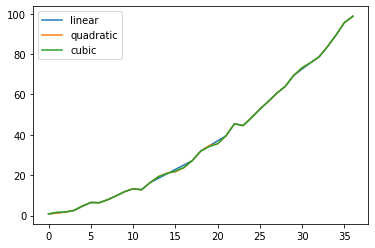

In [17]:
#use dictionary to create a dataframe, and comprehensive expression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12345) # fix the random numbers
x1 = np.arange(1, 10.1, .25)
print('x1=\n')
print(x1)
x = x1**2
print('x=\n')
print(x)

n=np.size(x)
print('n=%d'%(n))

y = pd.Series(x + np.random.randn(n))#generate a pandas.core.series.Series = argument
print('y=\n')
print(y)

bad=np.array([1,4,13,14,15,16,19, 20,30]) # generate a few missing values
y[bad] = np.nan # missing code is np.nan
print('new y=\n')
print(y)

#plot
plt.figure(figsize=(7,4))
methods = ['linear', 'quadratic', 'cubic']  # interpolation methods by pd
df = pd.DataFrame({m: y.interpolate(method=m) for m in methods})
print('df=\n')
print(df)

df.plot()

In [19]:
import pandas as pd
df_example = pd.DataFrame({'a':[1],'b':[2]})
df_example

,a,b
0,1,2


In [20]:
import pandas as pd
df_example = pd.DataFrame({'a':1,'b':2}, index=[0])
df_example

,a,b
0,1,2


In [7]:
function_name = lambda x:x**2+x+8
function_name(100)
print(function_name(100))

10108


In [6]:
def func(x):
      return x**2+x+8
func(100)

10108